In [50]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter

In [59]:
 with MPRester("AQwsCqxPeioMztVOij") as m:
    # Structure for material id
    bs = m.get_phonon_bandstructure_by_material_id("mp-961774")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

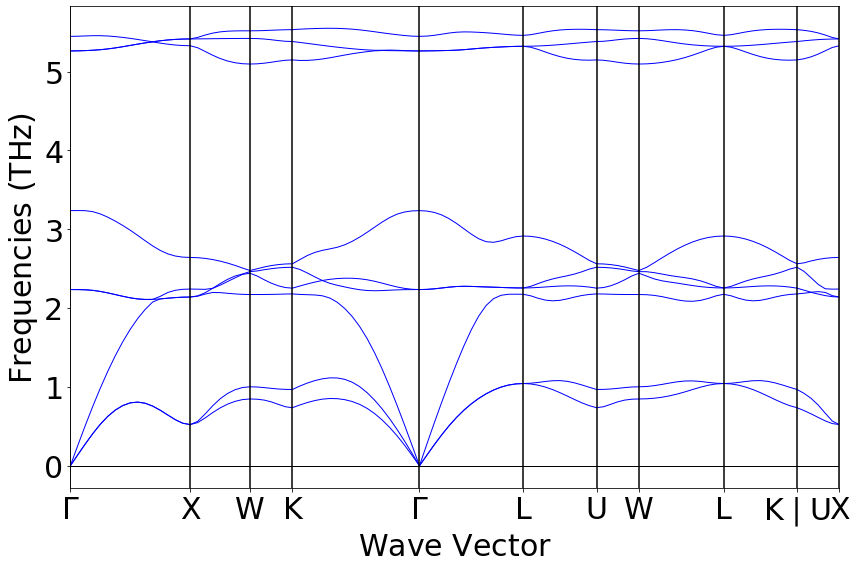

In [60]:
# Visualisation
PhononBSPlotter(bs).get_plot()

Nous avons trois bandes accoustiques où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Nous avons donc trois possibilités :$$\Gamma - X  ,  K -\Gamma  et  \Gamma - L$$
Pour obtenir la vitesse du son, nous devons utiliser une approximation linéaire liant la vitesse du son et il nous suffit dès lors de récupérer la pente de cette approximation linéaire pour de petits vecteurs d'onde et le vecteur d'onde q :
$${v_{s}} = \frac{\partial{\omega}}{\partial{q}}$$
où $\omega$ est la relation de dispersion de notre matériau 
Les fréquences sont en TerraHertz et le vecteur d'onde en Angström donc il va falloir convertir les valeurs obtenues en Hz et en m dans la formule.

In [95]:
distances = data.get("distances")
frequency = data.get("frequency")
#Première bande accoustique
vson1 = 2*np.pi*np.abs((frequency[0][0][1]-frequency[0][0][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("La vitesse du son dans la première bande accoustique (Γ - X) =",vson1," m/s.")
#Deuxième bande accoustique
vson2 = 2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("La vitesse du son dans la deuxième bande accoustique (K - Γ) =",vson2," m/s.")
#Troisième bande accoustique
vson3 = 2*np.pi*np.abs((frequency[4][0][1]-frequency[4][0][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("La vitesse du son dans la troisième bande accoustique (Γ - L) =",vson3," m/s.")

La vitesse du son dans la première bande accoustique (Γ - X) = 1666.2664466745282  m/s.
La vitesse du son dans la deuxième bande accoustique (K - Γ) = 1594.9196456929392  m/s.
La vitesse du son dans la troisième bande accoustique (Γ - L) = 1621.7997110544115  m/s.


In [ ]:
PhononBSPlotter(bs).get_plot()
# Première pente en vert
v = np.gradient(frequency[0][0],(distances[0][1]-distances[0][0]))
lin = np.multiply(v[0],distances[0])
lin = lin-v[0]*distances[0][0]
plt.plot(distances[0], lin, color="green")
# Première pente en jaune
v = np.gradient(frequency[3][1],(distances[3][0]-distances[3][1]))
lin = np.flip(np.multiply(-v[0],distances[3]))
lin = lin+v[0]*distances[3][0]
plt.plot(distances[3], lin, color="yellow")
# Troisième pente en rouge
v = np.gradient(frequency[4][2],(distances[4][1]-distances[4][0]))
lin = np.multiply(v[0],distances[4])
lin = lin-v[0]*distances[4][0]
plt.plot(distances[4], lin, color="red")